# Data Driven Business project

- Elijah Hofman
- Jack Pieper
- Rick van der Kleij
- Mathijs de Jong (V2B)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from cleaning import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from customAccuracy import *
import joblib

### Importeren dataset

In [9]:
# Load the data
df = load_data('sap_storing_data_hu_project.csv')

# Data understanding

In [10]:
df.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_mon_nr__statuscode,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,...,stm_fh_duur,stm_reactie_duur,stm_status_sapnaarmon,stm_schadenr,stm_rapportage_maand,stm_rapportage_jaar,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_vervallen_ind
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,326841.000000,741568.000000,6.057210e+05,...,898488.000000,8.984880e+05,326426.000000,7.617200e+05,898526.000000,898526.000000,898526.000000,898526.000000,8.985260e+05,898526.000000
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,4.489137,321.455539,1.062666e+07,...,923.148771,8.845657e+07,1.228597,9.375142e+06,6.636797,2013.259139,0.630154,129220.532107,7.288544e+06,0.014005
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,2.911721,270.687469,4.755891e+05,...,6404.546787,2.712747e+08,0.479859,1.447590e+09,3.403174,3.643254,0.482763,166867.221302,4.569528e+06,0.117512
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000001e+07,...,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,2006.000000,0.000000,0.000000,2.498014e+06,0.000000
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,2.000000,79.000000,1.021172e+07,...,11.000000,1.800000e+01,1.000000,0.000000e+00,4.000000,2010.000000,0.000000,1518.000000,3.673258e+06,0.000000
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,6.000000,203.000000,1.056452e+07,...,84.000000,6.700000e+01,1.000000,0.000000e+00,7.000000,2014.000000,1.000000,36941.000000,3.766232e+06,0.000000
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,7.000000,545.000000,1.092778e+07,...,256.000000,1.318000e+03,1.000000,0.000000e+00,10.000000,2016.000000,1.000000,250780.000000,1.280449e+07,0.000000
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,9.000000,952.000000,3.039590e+07,...,528297.000000,1.060469e+09,3.000000,1.235051e+12,12.000000,2019.000000,1.000000,579394.000000,1.301291e+07,1.000000


# Data voorbereiding

In [11]:
# Define the columns to drop
columns_to_drop = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld',
                   'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd',
                   'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt',
                   'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz',
                   'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt',
                   'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
                   'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum', 'stm_mon_eind_tijd',
                   'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon', 'stm_fact_jn', 'stm_akkoord_melding_jn',
                   'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd', 'stm_rec_toegev_ddt', 'stm_hinderwaarde',
                   'stm_actie', 'stm_standplaats', 'stm_status_gebr', 'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting',
                   'stm_schade_verhaalb_jn', 'stm_schadenr', 'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig',
                   'stm_relatiervo_volgend', 'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd',
                   'stm_sorteerveld', 'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
                   'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt', 'stm_x_vervallen_ind']

# Drop the unnecessary columns
df = drop_columns(df, columns_to_drop)

# Clean the data (handle missing values, remove columns with excessive NaNs)
df, avg_list, mode_list = clean_data(df)

# Preprocess the data
df = preprocess_data(df)

# Save the cleaned data to a new CSV (optional)
save_data(df, 'final_db_cleaned.csv')

# Optionally display results
print("Data cleaning and preprocessing complete.")

d:\school2.5\ddb2024\DDB2024\cleaning.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stm_geo_mld'].fillna(df['stm_geo_mld'].mean(), inplace=True)


Data cleaning and preprocessing complete.


Unnamed: 0                   0
#stm_sap_meldnr              0
stm_mon_nr                   0
stm_sap_meld_ddt             0
stm_sap_meldtekst_lang       0
                            ..
stm_fh_duur                  0
stm_reactie_duur             0
stm_sap_storeinddatum        0
stm_sap_storeindtijd         0
totale_functiehersteltijd    0
Length: 61, dtype: int64


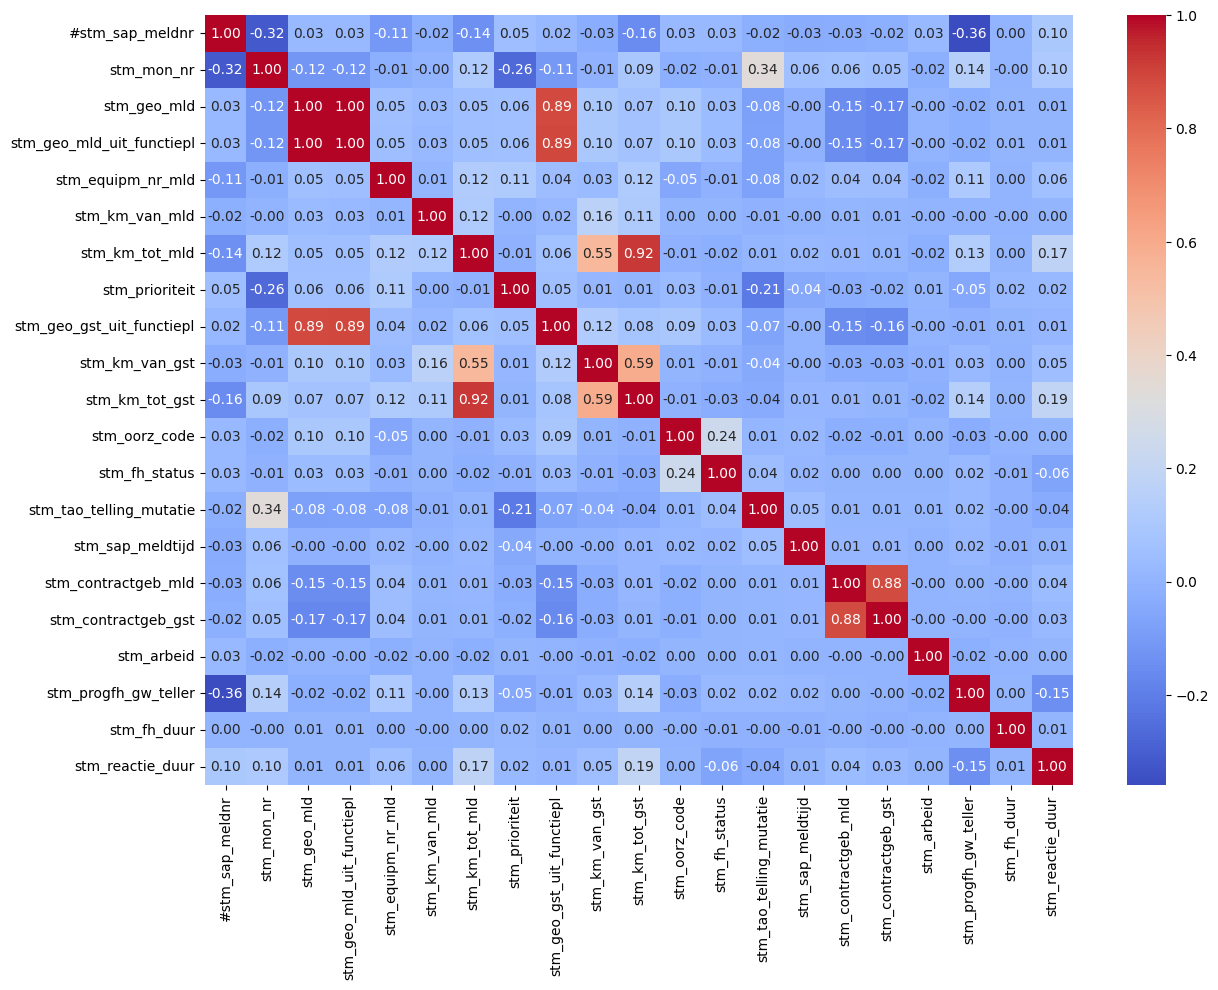

In [12]:
# Identificeer numerieke kolommen
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Toon het aantal ontbrekende waarden per kolom
print(df.isna().sum())

# Bereken de correlatiematrix voor numerieke kolommen en verwijder rijen/kolommen met alleen NaN-waarden
cmatrix = df[numeric_columns].corr().dropna(how='all', axis=1).dropna(how='all')

# Stel de grootte van de figuur in voor een grotere matrix
plt.figure(figsize=(14, 10))  # Pas deze waarden aan voor een nog groter formaat

# Plot de heatmap van de correlatiematrix
sns.heatmap(cmatrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
plt.close()


# target varible maken

In [13]:
# Maak kolom voor de targetvariabele, de tijd tussen aannemer ter plaatse en functieherstel
df['stm_aanntpl_tijd'] = pd.to_datetime(df['stm_aanntpl_tijd'], format="%H:%M:%S", errors='coerce')

# Records waar stm_aanntpl_tijd niet is ingevuld verwijderen (stm_aanntpl_tijd == 00:00:00 in deze gevallen)
df = df[df['stm_aanntpl_tijd'] != pd.to_datetime("00:00:00").time()]

# Kolom targetvariabele aanmaken
df['target'] = df['stm_fh_ddt'] - df['stm_aanntpl_tijd']

# Selecteer alleen de tijd van target
df['target'] = df['target'].dt.components.apply(lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1)

# Records met target van 0 minuten verwijderen (stm_aanntpl_tijd == stm_fh_ddt in deze gevallen)
df = df[df['target'] != pd.to_datetime("00:00:00").time()]

# Target converteren naar minuten zodat het in het model gebruikt kan worden
# Convert `target` to seconds
df['target'] = (df['target'] / pd.Timedelta(minutes=1)).astype(int)


df[['stm_sap_meld_ddt', 'stm_fh_ddt', 'totale_functiehersteltijd', 'stm_aanntpl_tijd', 'target', 'stm_fh_duur']].sample(10)

,stm_sap_meld_ddt,stm_fh_ddt,totale_functiehersteltijd,stm_aanntpl_tijd,target,stm_fh_duur
216280,2010-11-12 22:37:00,2010-11-12 23:18:00,0 days 00:41:00,1900-01-01 23:13:00,5,41.0
72070,2006-05-26 13:05:00,2006-05-26 14:32:00,0 days 01:27:00,1900-01-01 13:45:00,47,82.0
11179,2017-04-19 06:17:24,2017-04-19 07:15:00,0 days 00:57:36,1900-01-01 07:05:00,10,52.0
576112,2006-03-13 07:14:00,2006-03-13 11:40:00,0 days 04:26:00,1900-01-01 10:59:00,41,77.0
393378,2014-06-14 11:11:00,2014-06-14 12:31:00,0 days 01:20:00,1900-01-01 11:42:00,49,80.0
139048,2008-07-29 06:15:00,2008-07-29 06:58:00,0 days 00:43:00,1900-01-01 06:47:00,11,41.0
222987,2010-12-29 10:00:00,2010-12-29 12:29:00,0 days 02:29:00,1900-01-01 11:00:00,89,149.0
227566,2011-02-18 06:50:00,2011-02-18 08:41:00,0 days 01:51:00,1900-01-01 07:44:00,57,111.0
192584,2010-02-28 06:39:00,2010-02-28 08:27:00,0 days 01:48:00,1900-01-01 07:08:00,79,108.0
570602,2019-01-22 18:32:40,2019-01-22 20:04:05,0 days 01:31:25,1900-01-01 19:37:01,27,91.0


In [14]:
# Verwijder spaties aan het begin en einde van de waarden
df['stm_progfh_in_duur_clean'] = df['stm_progfh_in_duur'].str.strip()

# Vervang ongeldige waarden door NaN en converteer naar numeriek
df['stm_progfh_in_duur_clean'] = pd.to_numeric(df['stm_progfh_in_duur_clean'], errors='coerce')

# Vul NaN-waarden in met de gemiddelde waarde (zonder inplace=True)
df['stm_progfh_in_duur_clean'] = df['stm_progfh_in_duur_clean'].fillna(df['stm_progfh_in_duur_clean'].mean())

# Baseline model

In [15]:
# Extract the relevant columns
X = df[['stm_progfh_in_duur_clean']]  # Predictor
y = df['stm_fh_duur']                  # Target

# Handle missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 82.32783795744903
Mean Squared Error (MSE): 46820.450692544306
Root Mean Squared Error (RMSE): 216.38033804517522


Mean Squared Error van Decision Tree: 9119.165676668606
Mean Absolute Error van Decision Tree: 40.50093319360728
Root Mean Squared Error (RMSE): 95.4943227457455


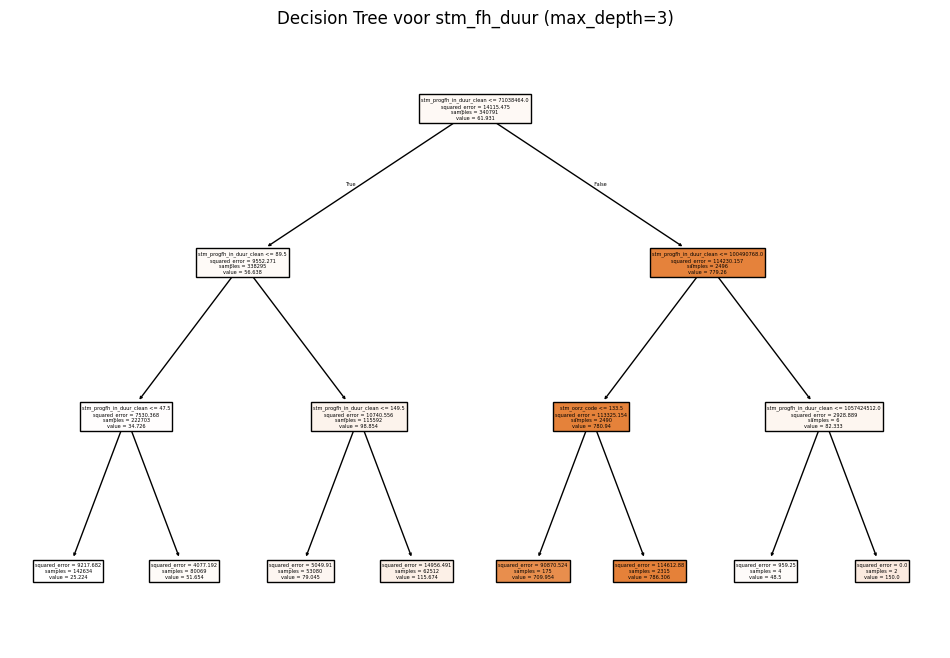

In [16]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code']]
y = df['target']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor aanmaken met beperkte diepte
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_dt = dt_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f'Mean Squared Error van Decision Tree: {mse_dt}') 
print(f'Mean Absolute Error van Decision Tree: {mae_dt}') 
print("Root Mean Squared Error (RMSE):", rmse_dt)

# Visualiseer de Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title('Decision Tree voor stm_fh_duur (max_depth=3)')
plt.show()


Mean Squared Error van Decision Tree: 8771.921873572344
Mean Absolute Error van Decision Tree: 39.79553620606668
Root Mean Squared Error (RMSE): 93.65853871149359


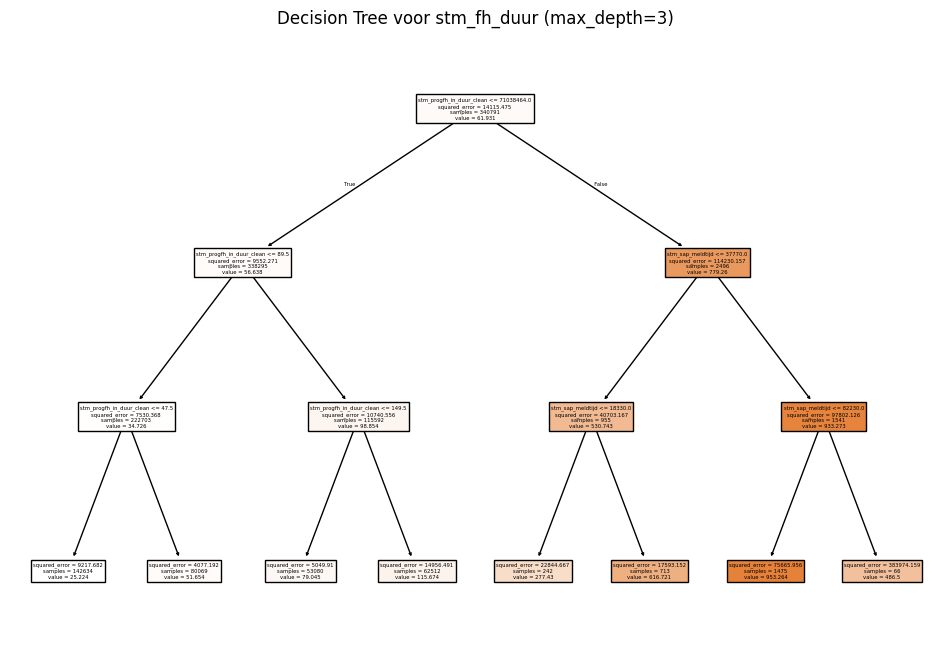

In [17]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code', 'stm_geo_mld', 'stm_prioriteit', 'stm_sap_meldtijd']]
y = df['target']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor aanmaken met beperkte diepte
dt2_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train het model
dt2_model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_dt = dt2_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse2_dt = mean_squared_error(y_test, y_pred_dt)
mae2_dt = mean_absolute_error(y_test, y_pred_dt)
rmse2_dt = np.sqrt(mse2_dt)

print(f'Mean Squared Error van Decision Tree: {mse2_dt}') 
print(f'Mean Absolute Error van Decision Tree: {mae2_dt}') 
print("Root Mean Squared Error (RMSE):", rmse2_dt)

# Visualiseer de Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt2_model, feature_names=X.columns, filled=True)
plt.title('Decision Tree voor stm_fh_duur (max_depth=3)')
plt.show()

Beste hyperparameters: {'max_depth': 20, 'n_estimators': 100}


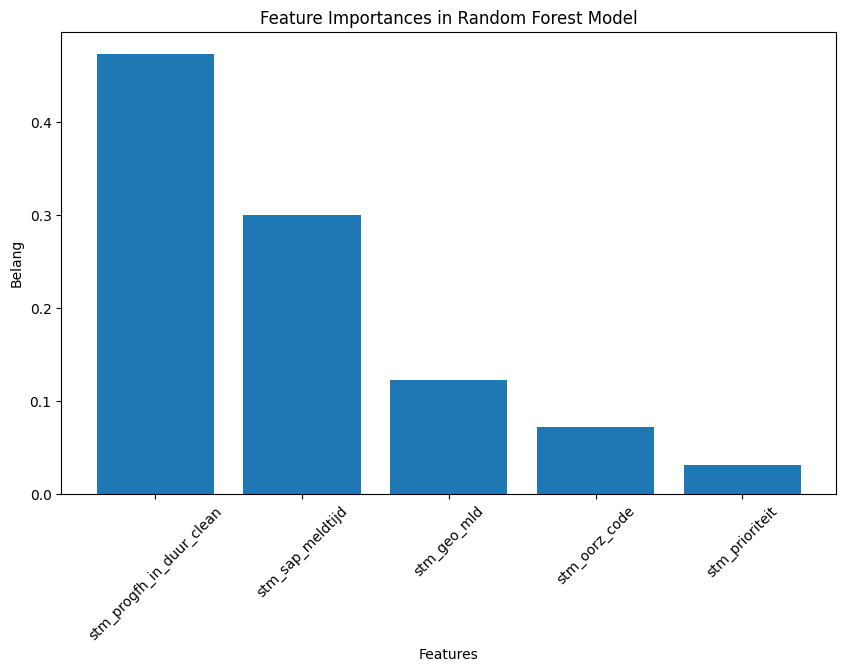

In [18]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code', 'stm_geo_mld', 'stm_prioriteit', 'stm_sap_meldtijd']]
y = df['target']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instellen van de parameters voor Grid Search
param_grid = {
    'max_depth': [3, 5, 10, 20],  # Verschillende diepten van de bomen
    'n_estimators': [100],  # We houden het aantal estimators constant op 100
}

# Grid Search aanmaken
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Train het model met Grid Search
grid_search.fit(X_train, y_train)

# Beste model en parameters
best_rf_model = grid_search.best_estimator_
print(f'Beste hyperparameters: {grid_search.best_params_}')

# Sla het beste model op
joblib.dump(best_rf_model, 'beste_random_forest_model.pkl')

# Maak voorspellingen op de testset met het beste model
y_pred_rf = best_rf_model.predict(X_test)

# Belangrijkste kenmerken van het model plotten
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Belang")
plt.show()

Nauwkeurigheid binnen 10-minuten-bins: 0.27


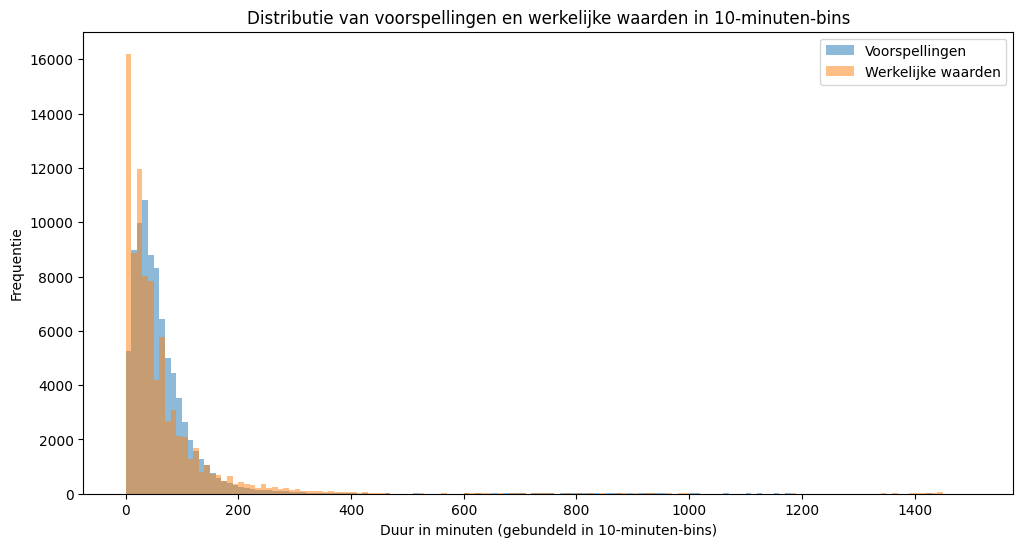

In [19]:
# Limiteer de voorspellingen en werkelijke waarden
max_duration = 1500
y_pred_binned = np.clip(np.round(y_pred_rf / 10) * 10, 0, max_duration)
y_test_binned = np.clip(np.round(y_test / 10) * 10, 0, max_duration)

# Bereken de nauwkeurigheid binnen deze limiet
accuracy = accuracy_score(y_test_binned, y_pred_binned)
print(f"Nauwkeurigheid binnen 10-minuten-bins: {accuracy:.2f}")

# Unieke bins en frequenties berekenen in minuten
bins = np.unique(y_test_binned)
bin_counts = [(y_test_binned == bin).sum() for bin in bins if bin <= max_duration]

# Distributie van voorspellingen en werkelijke waarden plotten
plt.figure(figsize=(12, 6))
plt.hist(y_pred_binned, bins=np.arange(0, max_duration + 10, 10), alpha=0.5, label='Voorspellingen')
plt.hist(y_test_binned, bins=np.arange(0, max_duration + 10, 10), alpha=0.5, label='Werkelijke waarden')
plt.xlabel("Duur in minuten (gebundeld in 10-minuten-bins)")
plt.ylabel("Frequentie")
plt.legend()
plt.title("Distributie van voorspellingen en werkelijke waarden in 10-minuten-bins")
plt.show()